# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [1]:
import os

In [2]:
!pwd

/content


In [3]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [9]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 116MB/s]


In [10]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [11]:
train_fname='data/train.tsv.zip'
test_name='data/test.tsv.zip'
sub_fname='data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [12]:
import pandas as pd

In [13]:
raw_df=pd.read_csv(train_fname,sep='\t')

In [14]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [15]:
raw_df.Phrase.sample(10).values

array(['intriguing what-if premise', 'flashes',
       'forbidden love , racial tension , and other issues that are as valid today as they were in the 1950s',
       'been discovered , indulged in and rejected as boring before I see this piece of crap again',
       ', dishonest', "S1M0NE 's",
       'The hypnotic imagery and fragmentary tale explore the connections between place and personal identity .',
       ', relatively lightweight commercial fare such as Notting Hill to commercial fare with real thematic heft .',
       'truly funny', 'honorable'], dtype=object)

In [16]:
test_df=pd.read_csv(test_name,sep='\t')

In [17]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [18]:
sub_df=pd.read_csv(sub_fname)

In [19]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [20]:
raw_df['Sentiment'].unique()

array([1, 2, 3, 4, 0])

<Axes: >

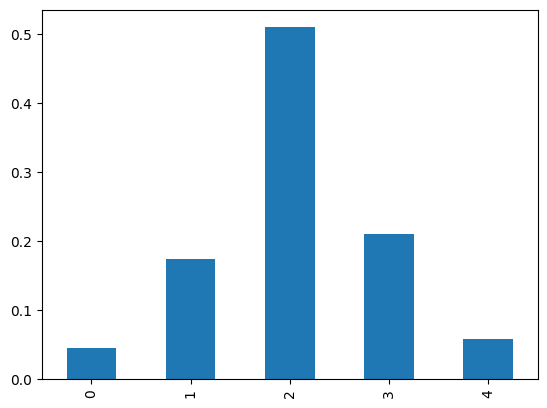

In [21]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

In [22]:
raw_df.groupby('Sentiment')['PhraseId'].nunique()

Sentiment
0     7072
1    27273
2    79582
3    32927
4     9206
Name: PhraseId, dtype: int64

Summarize your insights and learnings from the dataset below:

* There are 5 unique sentiments labelled as 0,1,2,3,4
* The most common sentiment is 2 that is neutral.
* The least common sentiment is 0 that is negative

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [23]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
stemmer=SnowballStemmer(language='english')

In [25]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [26]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
english_stopwords=stopwords.words('english')
selectected_stopwords=english_stopwords[:115]

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vectorizer=TfidfVectorizer(tokenizer=tokenize,stop_words=selectected_stopwords,ngram_range=(1,2),max_features=2000)

In [30]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7d2b4f350310>)

In [31]:
len(vectorizer.vocabulary_)

2000

In [32]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [33]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [34]:
inputs=vectorizer.transform(raw_df.Phrase)

In [35]:
inputs.shape

(156060, 2000)

In [36]:
inputs.toarray()[0][:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
test_inputs=vectorizer.transform(test_df.Phrase)

In [ ]:
test_inputs.shape

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 473102 stored elements in Compressed Sparse Row format>

In [ ]:
TRAIN_SIZE=110_000

In [ ]:
train_inputs=inputs[:TRAIN_SIZE]
train_targets=raw_df.Sentiment[:TRAIN_SIZE]

In [ ]:
train_inputs.shape,train_targets.shape

((110000, 2000), (110000,))

In [ ]:
val_inputs=inputs[TRAIN_SIZE:]
val_targets=raw_df.Sentiment[TRAIN_SIZE:]

In [ ]:
val_inputs.shape,val_targets.shape

((46060, 2000), (46060,))

### Train Logistic Regression Model



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(train_inputs,train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
train_preds=model.predict(train_inputs)

In [ ]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [ ]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets,train_preds)

0.6381818181818182

In [ ]:
val_preds=model.predict(val_inputs)

In [ ]:
val_targets

110000    2
110001    0
110002    0
110003    1
110004    2
         ..
156055    2
156056    1
156057    3
156058    2
156059    2
Name: Sentiment, Length: 46060, dtype: int64

In [ ]:
val_preds

array([2, 0, 0, ..., 2, 2, 2])

In [ ]:
accuracy_score(val_targets,val_preds)

0.5795049934867564

### Study Predictions on Sample Inputs

In [ ]:
small_df=raw_df.sample(20)

In [ ]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
63443,63444,3210,grow boring ... which proves that Rohmer still...,1
150302,150303,8186,Like a can of 2-day old Coke .,0
118973,118974,6359,has lived her life half-asleep suddenly wake up,2
50971,50972,2509,", albeit one made by the smartest kids in class .",2
29780,29781,1381,The waterlogged script,1
130475,130476,7030,living under a rock,1
20850,20851,930,"He 's the con ,",2
66252,66253,3359,is so huge that a column of words can not adeq...,3
138803,138804,7523,be nice,2
49813,49814,2442,Dadaist proportions,2


In [ ]:
small_inputs=vectorizer.transform(small_df.Phrase)

In [ ]:
small_inputs.shape

(20, 2000)

In [ ]:
small_preds=model.predict(small_inputs)

In [ ]:
small_preds

array([3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 1, 1, 3, 3, 2, 2, 1])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score



In [ ]:
 test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 181514 stored elements in Compressed Sparse Row format>

In [ ]:
test_preds=model.predict(test_inputs)

In [ ]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
sub_df.Sentiment=test_preds

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [ ]:
sub_df.to_csv('submission.csv',index=None)

In [ ]:
!head sun=bmission.csv

head: cannot open 'sun=bmission.csv' for reading: No such file or directory


## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional:
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips:

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1-

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=42)
model1.fit(train_inputs,train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
accuracy_score(train_targets,model1.predict(train_inputs))

In [ ]:
accuracy_score(val_targets,model1.predict(val_inputs))

### Model 2

### Model 3

Best Model:

???

(include Kaggle score screenshot)

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
